Adınız: Cahit

Soyadınız: Doğan

Okul Numaranız: 2112721009

GitHub Repo Bağlantısı: https://github.com/cahitdogan/Genetic-Algorithm

In [4]:
# Kütüphaneler
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
# Sınıf ve Değişken Tanımları

class Birey:
    def __init__(self, x1, x2):
        self.genler = [x1, x2]
        self.fitness = 0

    def __repr__(self):
        return f"Genler: [{self.genler[0]:.2f}, {self.genler[1]:.2f}] | Fitness: {self.fitness:.4f}"

# Problem Sabitleri
MUTASYON_BUYUKLUGU = 0.2
POPULASYON_BOYUTU = 4
NESIL_SAYISI = 100 #

# Kısıtlar ve Aralıklar
X1_MIN, X1_MAX = 0, 10
X2_MIN, X2_MAX = 0, 10
KISIT_TOPLAM = 12
KISIT_X2_ALT = 2

In [6]:
# Yardımcı Fonksiyonlar

def fitness_hesapla(birey):
    """
    Amaç fonksiyonu: y = 4x1 + 5x2 - 0.5x1^2 - 0.2x2^2
    Kısıtlar sağlanmazsa ceza puanı uygulanır (fitness = 0 veya çok düşük yapılır).
    """
    x1, x2 = birey.genler

    # Kısıt Kontrolü
    # 1. x1 + x2 <= 12
    # 2. x2 >= 2
    # Aralık kontrolleri zaten üretimde yapılır ama yine de ceza eklenebilir.

    kural_ihlali = False
    if (x1 + x2) > KISIT_TOPLAM:
        kural_ihlali = True
    if x2 < KISIT_X2_ALT:
        kural_ihlali = True
    # Değişken sınırları
    if not (X1_MIN <= x1 <= X1_MAX) or not (X2_MIN <= x2 <= X2_MAX):
        kural_ihlali = True

    if kural_ihlali:
        # Ceza: Fitness çok düşük bir değer atanır.
        # Problem maksimizasyon olduğu için 1e-6 gibi pozitif küçük bir sayı veya 0 verilebilir.
        return 1e-6

    y = 4*x1 + 5*x2 - 0.5*(x1**2) - 0.2*(x2**2)

    # Fitness negatif olmamalı (Roulette Wheel için), eğer negatifse 1e-6 dönebiliriz.
    return max(y, 1e-6)

def birey_olustur():
    """Rastgele genlere sahip bir birey oluşturur."""
    x1 = random.uniform(X1_MIN, X1_MAX)
    x2 = random.uniform(X2_MIN, X2_MAX)
    return Birey(x1, x2)

def populasyon_olustur(boyut=POPULASYON_BOYUTU):
    """Belirtilen boyutta rastgele popülasyon oluşturur."""
    return [birey_olustur() for _ in range(boyut)]

# --- 3. Genetik Operatörler ---

def rulet_tekerlegi_secimi(populasyon):
    """
    Fitness değerlerine göre normalize edilmiş olasılıklarla seçim yapar.
    Popülasyon boyutu kadar birey seçer.
    """
    # Fitness değerlerini topla
    toplam_fitness = sum(b.fitness for b in populasyon)

    if toplam_fitness == 0:
        # Herkes 0 ise rastgele seç
        return random.choices(populasyon, k=len(populasyon))

    # Olasılıkları hesapla (Normalize et)
    olasiliklar = [b.fitness / toplam_fitness for b in populasyon]

    # Kümülatif olasılık aralıkları (Rulet mantığı built-in choices ile yapılabilir ama adım adım yazalım)
    # Python random.choices bu işi ağırlıklı olarak yapar.
    # Adım 5 detayındaki "0 ile 1 arasında sayı üretilip aralık kontrolü" mantığını random.choices simüle eder.

    secilenler = random.choices(populasyon, weights=olasiliklar, k=len(populasyon))

    # Seçilenlerin kopyasını döndürüyoruz ki orijinal nesneler değişmesin (referans karışıklığı olmasın)
    # Ancak Python'da shallow copy yeterli olabilir mi? Genler liste olduğu için yeni Birey oluşturmak en iyisi.
    yeni_secilenler = []
    for b in secilenler:
        yeni_secilenler.append(Birey(b.genler[0], b.genler[1]))

    return yeni_secilenler

def caprazlama(parent1, parent2):
    """
    Birinci bireyin ilk geni ve ikinci bireyin ikinci geni alınarak yeni birey oluşturulur.
    """
    yeni_gen1 = parent1.genler[0]
    yeni_gen2 = parent2.genler[1]
    return Birey(yeni_gen1, yeni_gen2)

def mutasyon(birey):
    """
    Aritmetik mutasyon uygular.
    Yeni Değer = Mevcut Değer + Mutasyon Büyüklüğü * (Rastgele Sayı - 0.5)
    Rastgele Sayı: [0, 1] yerine [-0.5, 0.5] aralığı sonucu verir.
    """
    yeni_genler = []
    for gen in birey.genler:
        rastgele_sayi = random.random() # 0.0 - 1.0
        delta = MUTASYON_BUYUKLUGU * (rastgele_sayi - 0.5)
        yeni_deger = gen + delta
        yeni_genler.append(yeni_deger)

    # Mutasyon sonrası bireyin genlerini güncelle
    birey.genler = yeni_genler
    # Sınırları kontrol etmek iyi olurdu ama algoritma adımlarında açıkça belirtilmemiş.
    # Yine de mantıken sınırlar içinde kalmalı. Şimdilik saf mutasyon uyguluyoruz.
    return birey

def turnuva_secimi(havuz, k=2):
    """Havuzdan rastgele k birey seçip en iyisini döndürür."""
    adaylar = random.sample(havuz, k)
    adaylar.sort(key=lambda x: x.fitness, reverse=True)
    return adaylar[0]

Başlangıç Popülasyonu En İyi Fitness: 33.7417
Nesil 1 En İyi Fitness: 33.8454 | Genler: [1.6669562982891002, 8.837346202029801]
Nesil 2 En İyi Fitness: 34.0391 | Genler: [1.7521209459153007, 8.836412350354186]
Nesil 3 En İyi Fitness: 34.1992 | Genler: [1.8326741488087057, 8.824290439623184]
Nesil 4 En İyi Fitness: 34.4219 | Genler: [1.9104484675482052, 8.863389075912218]
Nesil 5 En İyi Fitness: 34.5965 | Genler: [1.9343805226951947, 8.950248424967365]
Nesil 6 En İyi Fitness: 34.6678 | Genler: [1.9388496232146732, 8.99429996396713]
Nesil 7 En İyi Fitness: 34.7903 | Genler: [2.037719787877179, 8.940205685902555]
Nesil 8 En İyi Fitness: 34.9603 | Genler: [2.0597859060643535, 9.030466427485996]
Nesil 9 En İyi Fitness: 35.1256 | Genler: [2.1171100662503965, 9.070875185234799]
Nesil 10 En İyi Fitness: 35.2215 | Genler: [2.109360449912595, 9.152450731429992]
Nesil 11 En İyi Fitness: 35.2340 | Genler: [2.1413302348229144, 9.117164993579737]
Nesil 12 En İyi Fitness: 35.4781 | Genler: [2.2173232

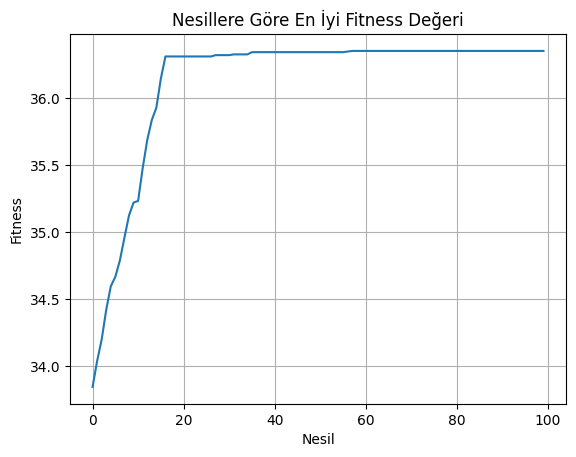

In [7]:
def genetik_algoritma_calistir():
    en_iyi_fitness_gecmisi = []

    # Başlangıç popülasyonu oluşturulması
    populasyon = populasyon_olustur()

    # İlk fitness hesaplaması
    for b in populasyon:
        b.fitness = fitness_hesapla(b)

    print(f"Başlangıç Popülasyonu En İyi Fitness: {max(b.fitness for b in populasyon):.4f}")

    for nesil in range(1, NESIL_SAYISI + 1):
        # Seçilim (Rulet Tekerleği)
        secilenler = rulet_tekerlegi_secimi(populasyon)

        # Çaprazlama (Her ikili kombinasyon)
        cocuklar = []
        # Seçilen bireyler listesindeki her ikili kombinasyon için döngü
        # Popülasyon 4 ise, 4 birey seçildi. Kombinasyon sayısı C(4,2)=6.
        for i in range(len(secilenler)):
            for j in range(i + 1, len(secilenler)):
                p1 = secilenler[i]
                p2 = secilenler[j]
                cocuk = caprazlama(p1, p2)
                cocuklar.append(cocuk)

        # Mutasyon
        mutant_bireyler = []
        for cocuk in cocuklar:
            mutant_kopyasi = Birey(cocuk.genler[0], cocuk.genler[1])
            mutant_bireyler.append(mutasyon(mutant_kopyasi))

        # Havuz Oluşturma ve Fitness Hesaplama
        # Havuz = Seçilmiş Bireyler (önceki) + Mutant Bireyler
        # Dikkat: "seçilmiş bireylerin çaprazlama ve mutasyona uğramadan önceki durumları" denmiş.
        # secilenler listesini zaten kopyalayarak oluşturmuştuk, mutasyona uğramadılar.

        havuz = secilenler + mutant_bireyler

        for b in havuz:
            b.fitness = fitness_hesapla(b)

        # Yeni Nesil Seçimi
        yeni_populasyon = []

        # Havuzdaki en iyi bireyi al (Elitizm)
        havuz.sort(key=lambda x: x.fitness, reverse=True)
        en_iyi_birey = havuz[0]
        yeni_populasyon.append(en_iyi_birey) # 1. birey

        # Geri kalan (POPULASYON_BOYUTU - 1) kontenjan için Turnuva Seçimi
        # Havuzdan, halihazırda seçilen en iyi birey dışındakilerle mi yoksa hepsiyle mi?
        # Genelde tüm havuzdan seçilir.
        while len(yeni_populasyon) < POPULASYON_BOYUTU:
            kazanan = turnuva_secimi(havuz)
            # Derin kopya ile ekleyelim ki sonraki işlemlerde referans sorunu olmasın
            yeni_populasyon.append(Birey(kazanan.genler[0], kazanan.genler[1]))

        populasyon = yeni_populasyon

        # En iyiyi kaydet
        en_iyi_fitness_gecmisi.append(en_iyi_birey.fitness)
        print(f"Nesil {nesil} En İyi Fitness: {en_iyi_birey.fitness:.4f} | Genler: {en_iyi_birey.genler}")

    # --- Raporlama ---
    en_iyi_son = max(populasyon, key=lambda x: x.fitness)
    print("\n--- Sonuç ---")
    print(f"En İyi Birey: {en_iyi_son}")

    # Grafiği çiz
    plt.plot(en_iyi_fitness_gecmisi)
    plt.title("Nesillere Göre En İyi Fitness Değeri")
    plt.xlabel("Nesil")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    genetik_algoritma_calistir()